Se emplean funciones de data engineer, data analitics para realizar y obtener metricas y KPIs

In [195]:
# Se importan librerías a usar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [196]:
# Se descargan archivos csv a asociados al análisis de datos
Acceso_internet_fijo_velocidadbajada_provincia=pd.read_csv('Datasets/AccesosaInternetfijoporvelocidadbajadayprovincia_2791741685050936567.csv')
Acceso_internet_fijo_velocidadbajada_localidad=pd.read_csv('Datasets/AccesosaInternetfijoporvelocidaddebajadaylocalidad_2776171685050986091.csv')
Conectividad_Servicio_Internet=pd.read_csv('Datasets/ConectividadalserviciodeInternet_2776151685051230707.csv')
Historica_velocidad_internet=pd.read_csv('Datasets/historico_velocidad_internet.csv')
Internet_Accesos_por_tecnologia=pd.read_csv('Datasets/Internet_Accesos-por-tecnologia.csv')
Internet_Accesos_velocidad=pd.read_csv('Datasets/Internet_Accesos-por-tecnologia.csv')
Internet_BAF=pd.read_csv('Datasets/Internet_BAF.csv')
Internet_ingresos = pd.read_csv('Datasets/Internet_Ingresos.csv', encoding='utf-8')
Internet_Penetracion = pd.read_csv('Datasets\Internet_Penetracion.csv', encoding='utf-8')
Listado_localidades_conectividad_internet=pd.read_csv('Datasets/Listadodelocalidadesconconectividadainternet_2750221685051211461.csv')

Se considera para el análisis económico primeramente el DF asociado a Acceso_internet_fijo_velocidadbajada_provincia.
Debido a que la velocidad de internet es una medida indiecta de acceso a internet en el país y con ello de crecimiento 
económico asociado desde el punto de vista empresarial. 

In [121]:
#Evalúo el tipo de datos para cada columna con la finalidad de saber que debo normalizar
Acceso_internet_fijo_velocidadbajada_provincia.dtypes

Año           float64
Trimestre     float64
Provincia      object
Otros          object
0,256 Mbps     object
               ...   
80 Mbps        object
81 Mbps        object
83 Mbps        object
82 Mbps        object
86 Mbps        object
Length: 97, dtype: object

In [122]:
#Me aseguro que el tipo de dato quede como debe ser en cada columna
Acceso_internet_fijo_velocidadbajada_provincia['Año'] = Acceso_internet_fijo_velocidadbajada_provincia['Año'].fillna(0).astype(int)
Acceso_internet_fijo_velocidadbajada_provincia['Trimestre'] = Acceso_internet_fijo_velocidadbajada_provincia['Trimestre'].fillna(0).astype(int)

#Cambio los "-0" a "0"; esto debido a que no deseo quitarlo dado que los numeros asocidos a Mbps 
# # represetan nuúmero de personas con acceso a esa cantidad de Mbps

columnas_mbps = ['0,256 Mbps', '0,375 Mbps', '0,625 Mbps', '0,5 Mbps', '0,512 Mbps', '0,75 Mbps', '70 Mbps', '71 Mbps', '75 Mbps', '77 Mbps', '78 Mbps', '80 Mbps', '81 Mbps', '83 Mbps', '82 Mbps', '86 Mbps']
Acceso_internet_fijo_velocidadbajada_provincia[columnas_mbps] = Acceso_internet_fijo_velocidadbajada_provincia[columnas_mbps].replace('- 0', '0', regex=True)

#Elimino la fila que tiene valores nulos 
Acceso_internet_fijo_velocidadbajada_provincia.drop(480, inplace=True)

#Elimino la columna otros porque no la requiero, no entiendo su función
Acceso_internet_fijo_velocidadbajada_provincia.drop(columns=['Otros'], axis=1, inplace=True)

#Cambio finalmente todos los valores asociados a la columna Mbps a valores enteros y no str, con la finalidad de obtener métricas
# Y KPIs posteriormente 

Columnas_numericas = Acceso_internet_fijo_velocidadbajada_provincia.columns[3:]
Acceso_internet_fijo_velocidadbajada_provincia[Columnas_numericas] = Acceso_internet_fijo_velocidadbajada_provincia[Columnas_numericas].replace({",": ""}, regex=True).replace(r'[^\d.]+', '', regex=True).astype(int)

In [123]:
#Chequeo como vienen mis datos
Acceso_internet_fijo_velocidadbajada_provincia.dtypes

Año            int32
Trimestre      int32
Provincia     object
0,256 Mbps     int32
0,375 Mbps     int32
               ...  
80 Mbps        int32
81 Mbps        int32
83 Mbps        int32
82 Mbps        int32
86 Mbps        int32
Length: 96, dtype: object

In [124]:
Acceso_internet_fijo_velocidadbajada_provincia

,Año,Trimestre,Provincia,"0,256 Mbps","0,375 Mbps","0,625 Mbps","0,5 Mbps","0,512 Mbps","0,75 Mbps",1 Mbps,...,70 Mbps,71 Mbps,75 Mbps,77 Mbps,78 Mbps,80 Mbps,81 Mbps,83 Mbps,82 Mbps,86 Mbps
0,2022,3,Buenos Aires,19,0,0,29774,192,4611,23098,...,3163,0,98387,0,2,223,0,1,0,0
1,2022,3,Capital Federal,31,0,0,451,35,1307,4435,...,3,0,30482,0,0,8,0,0,0,0
2,2022,3,Catamarca,0,0,0,34,37,0,384,...,0,0,0,0,0,0,0,0,0,0
3,2022,3,Chaco,0,225,111,234,2,0,876,...,0,0,0,0,0,0,0,0,0,0
4,2022,3,Chubut,8,0,0,69,32,836,608,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,2017,4,Santa Cruz,0,0,0,68,0,0,78,...,0,0,0,0,0,0,0,0,0,0
476,2017,4,Santa Fe,0,0,0,3109,0,7637,26495,...,0,0,0,0,0,0,0,0,0,0
477,2017,4,Santiago Del Estero,0,0,0,41,0,909,2182,...,0,0,0,0,0,0,0,0,0,0
478,2017,4,Tierra Del Fuego,0,0,0,6,0,282,28,...,0,0,0,0,0,0,0,0,0,0


In [125]:
#Selecciono mis columnas a estudiar en este caso me interesa agrupar por provincia y año y debo seleccionar todos los rangos de Mbps
columnas = ['0,256 Mbps', '0,375 Mbps', '0,625 Mbps', '0,5 Mbps', '0,512 Mbps', '0,75 Mbps', '1 Mbps', '1,2 Mbps', '1,25 Mbps', '1,5 Mbps', '2 Mbps', '2,2 Mbps', '2,5 Mbps',
            '6,7 Mbps', '3 Mbps', '3,2 Mbps', '3,3 Mbps', '3,5 Mbps', '4 Mbps',
            '4,5 Mbps', '5 Mbps', '6 Mbps', '6,4 Mbps', '7 Mbps', '7,5 Mbps',
            '8 Mbps', '9 Mbps', '10 Mbps', '10,6 Mbps', '11 Mbps', '12 Mbps',
            '13 Mbps', '14 Mbps', '15 Mbps', '16 Mbps', '17 Mbps', '18 Mbps',
            '19 Mbps', '20 Mbps', '21 Mbps', '22 Mbps', '23 Mbps', '24 Mbps',
            '25 Mbps', '25,1 Mbps', '25,11 Mbps', '25,5 Mbps', '26 Mbps', '28 Mbps',
            '29 Mbps', '30 Mbps', '31 Mbps', '32 Mbps', '34 Mbps', '35 Mbps',
            '36 Mbps', '37 Mbps', '38 Mbps', '39 Mbps', '40 Mbps', '41 Mbps',
            '45 Mbps', '46 Mbps', '47 Mbps', '48 Mbps', '49 Mbps', '50 Mbps',
            '51 Mbps', '52 Mbps', '54 Mbps', '55 Mbps', '56 Mbps', '58 Mbps',
            '59 Mbps', '60 Mbps', '61 Mbps', '62 Mbps', '63 Mbps', '64 Mbps',
            '65 Mbps', '66 Mbps', '67 Mbps', '68 Mbps', '70 Mbps', '71 Mbps',
            '75 Mbps', '77 Mbps', '78 Mbps', '80 Mbps', '81 Mbps', '83 Mbps',
            '82 Mbps', '86 Mbps']

#Agrupo por Año y provincia
grouped_data = Acceso_internet_fijo_velocidadbajada_provincia.groupby(['Año', 'Provincia'])[columnas].sum()
grouped_data = grouped_data.reset_index() #Reindexo las columnas porque se desajustaron

max_columns = grouped_data[columnas].idxmax(axis=1) #Busco el valor máximo que en este caso está asociado al valor maximo entre cantidad de personas

#Busco por fila cual es la cantidad maxima de personas agrupada para una determinada Mbps
grouped_data['Cantidad de Personas'] = grouped_data.apply(lambda row: row[max_columns[row.name]], axis=1)

# Obtener el valor máximo y la columna correspondiente
max_values = grouped_data[columnas].max(axis=1)
max_columns = grouped_data[columnas].idxmax(axis=1)
grouped_data['Cantidad de Personas'] = max_values
grouped_data['Max_Velocidad'] = max_columns

# Mostrar resultado con las columnas deseadas
result = grouped_data[['Año', 'Provincia', 'Max_Velocidad', 'Cantidad de Personas']]
result

,Año,Provincia,Max_Velocidad,Cantidad de Personas
0,2017,Buenos Aires,6 Mbps,1346370
1,2017,Capital Federal,6 Mbps,503464
2,2017,Catamarca,6 Mbps,15074
3,2017,Chaco,6 Mbps,29234
4,2017,Chubut,6 Mbps,65963
...,...,...,...,...
139,2022,Santa Cruz,10 Mbps,27030
140,2022,Santa Fe,50 Mbps,613676
141,2022,Santiago Del Estero,10 Mbps,175702
142,2022,Tierra Del Fuego,12 Mbps,34816


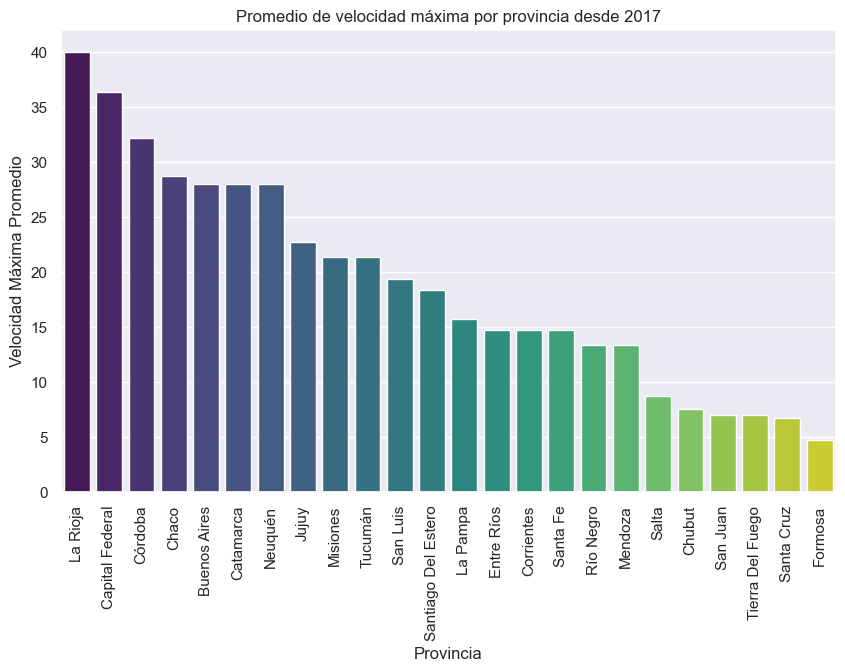

In [126]:
import seaborn as sns

# Remover los caracteres no numéricos y convertir a tipo float
result.loc[:, 'Max_Velocidad'] = result['Max_Velocidad'].str.replace('\D', '', regex=True).astype(float)

# Calcular el promedio de velocidad máxima por provincia
promedio_por_provincia = result.groupby('Provincia')['Max_Velocidad'].mean()

# Ordenar las provincias por el promedio de velocidad máxima
promedio_por_provincia = promedio_por_provincia.sort_values(ascending=False)

# Establecer el estilo de Seaborn
sns.set(style="darkgrid")

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=promedio_por_provincia.index, y=promedio_por_provincia.values, palette="viridis")

plt.title('Promedio de velocidad máxima por provincia desde 2017')
plt.xlabel('Provincia')
plt.ylabel('Velocidad Máxima Promedio')
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x para una mejor legibilidad
plt.show()

#Nuestro resultado muestra la metrica de crecimiento promedio de velocidad de internet por provincia

In [127]:
# Seleccionar solo los datos a partir de 2019, dado inicio de pandemia que fue cuando se optimizaron servicios de internet
result2019 = result.query('Año >= 2019')
result2019


,Año,Provincia,Max_Velocidad,Cantidad de Personas
48,2019,Buenos Aires,6.0,4426332
49,2019,Capital Federal,50.0,1703151
50,2019,Catamarca,6.0,37125
51,2019,Chaco,10.0,69111
52,2019,Chubut,6.0,221226
...,...,...,...,...
139,2022,Santa Cruz,10.0,27030
140,2022,Santa Fe,50.0,613676
141,2022,Santiago Del Estero,10.0,175702
142,2022,Tierra Del Fuego,12.0,34816


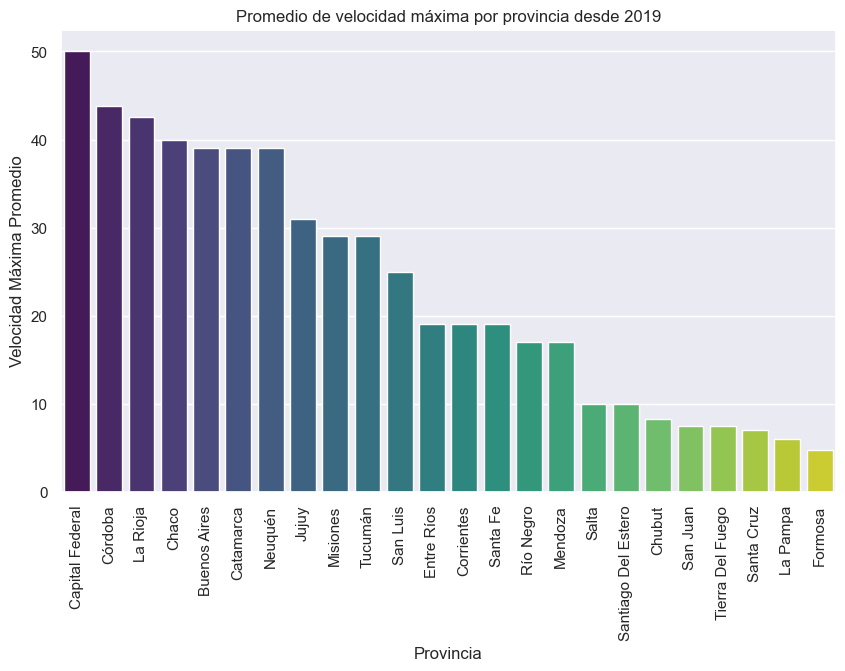

In [131]:
# Seleccionar solo los datos a partir de 2019
result2019 = result[result['Año'] >= 2019]

# Calcular el promedio de velocidad máxima por provincia
promedio_por_provincia = result2019.groupby('Provincia')['Max_Velocidad'].mean()

# Ordenar las provincias por el promedio de velocidad máxima
promedio_por_provincia = promedio_por_provincia.sort_values(ascending=False)

# Establecer el estilo de Seaborn
sns.set(style="darkgrid")

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=promedio_por_provincia.index, y=promedio_por_provincia.values, palette="viridis")

plt.title('Promedio de velocidad máxima por provincia desde 2019')
plt.xlabel('Provincia')
plt.ylabel('Velocidad Máxima Promedio')
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x para una mejor legibilidad
plt.show()


En base a estos datos procedemos a sacar el KPI, para lo cual debemos obtener el promedio de crecimiento entre cada una de las provincias y luego 
a este crecimiento sacarle el promedio. Nuestro resultado demuestra que existe un crecimiento promedio de velocidad de internet entre los años
2017 a 2022 de 459% es decir que podemos estimar que para el año 2023 la tasa de velocidad aumentaría posiblemente un 91.8% 

In [134]:
# Seleccionar los años inicial y final para calcular el porcentaje de crecimiento
año_inicial = 2019
año_final = 2022

# Filtrar las filas correspondientes a los años seleccionados
data_inicial = result[result['Año'] == año_inicial]
data_final = result[result['Año'] == año_final]

# Inicializar una lista para almacenar los porcentajes de crecimiento por provincia
crecimiento_por_provincia = []

# Calcular el porcentaje de crecimiento para cada provincia y almacenarlo en la lista
for provincia in result['Provincia'].unique():
    velocidad_inicial = data_inicial[data_inicial['Provincia'] == provincia]['Max_Velocidad'].astype(float).values[0]
    velocidad_final = data_final[data_final['Provincia'] == provincia]['Max_Velocidad'].astype(float).values[0]
    crecimiento = ((velocidad_final - velocidad_inicial) / velocidad_inicial) * 100
    crecimiento_por_provincia.append(int(crecimiento))  # Convertir el resultado a entero

# Calcular el promedio de crecimiento entre las provincias
promedio_crecimiento_provincias = sum(crecimiento_por_provincia) / len(crecimiento_por_provincia)

# Imprimir el promedio de crecimiento entre las provincias
print(f"El promedio de crecimiento en velocidad de internet entre las provincias entre {año_inicial} y {año_final} es: {int(promedio_crecimiento_provincias)}%")  # Convertir el resultado a entero

# Calcular el crecimiento promedio anual
crecimiento_promedio_anual = promedio_crecimiento_provincias / (año_final - año_inicial)
print(f"El crecimiento promedio anual estimado es: {int(crecimiento_promedio_anual)}%")  # Convertir el resultado a entero

El promedio de crecimiento en velocidad de internet entre las provincias entre 2019 y 2022 es: 368%
El crecimiento promedio anual estimado es: 122%


Obtengo el análisis del siguiente DF Conectividad_Servicio_Internet, dado que puede arrojar 
datos del tipo de internet por provincia y se pueden sacar metricas de allí y saber cual es 
el tipo de internet predominante en Argentina.

In [177]:
#Reviso mis datos, lo primero que noto es que en Provincias está todo en mayúscula y no es agradable a la vista, lo decido normalizar
Conectividad_Servicio_Internet.head(5)


,Provincia,Partido,Localidad,Poblacion,ADSL,CABLEMODEM,DIALUP,FIBRAOPTICA,SATELITAL,WIRELESS,TELEFONIAFIJA,3G,4G,link,Latitud,Longitud
0,Buenos aires,Bahía Blanca,Villa Bordeau,0,--,--,--,--,--,--,--,SI,SI,6056020.0,"-38,6472605094596","-62,3200223419024"
1,Buenos aires,Bahía Blanca,Villa Espora,0,--,--,--,--,--,--,--,--,--,6056020.0,"-38,7765069529222","-62,1851833537179"
2,Buenos aires,Balcarce,Balcarce,38376,SI,SI,SI,SI,--,SI,SI,SI,SI,6063010.0,"-37,8482779294345","-58,2551665841248"
3,Buenos aires,Balcarce,Los Pinos,337,--,--,--,--,--,SI,SI,--,--,6063020.0,"-37,9412057603","-58,3225920150442"
4,Buenos aires,Balcarce,Napaleofú,374,--,--,--,SI,--,SI,SI,SI,SI,6063030.0,"-37,6254980210026","-58,7461862359423"


In [178]:
# Convertir la primera letra en mayúscula y el resto en minúscula
Conectividad_Servicio_Internet['Provincia']= Conectividad_Servicio_Internet['Provincia'].str.lower().str.capitalize()
Conectividad_Servicio_Internet

,Provincia,Partido,Localidad,Poblacion,ADSL,CABLEMODEM,DIALUP,FIBRAOPTICA,SATELITAL,WIRELESS,TELEFONIAFIJA,3G,4G,link,Latitud,Longitud
0,Buenos aires,Bahía Blanca,Villa Bordeau,0,--,--,--,--,--,--,--,SI,SI,6056020.0,"-38,6472605094596","-62,3200223419024"
1,Buenos aires,Bahía Blanca,Villa Espora,0,--,--,--,--,--,--,--,--,--,6056020.0,"-38,7765069529222","-62,1851833537179"
2,Buenos aires,Balcarce,Balcarce,38376,SI,SI,SI,SI,--,SI,SI,SI,SI,6063010.0,"-37,8482779294345","-58,2551665841248"
3,Buenos aires,Balcarce,Los Pinos,337,--,--,--,--,--,SI,SI,--,--,6063020.0,"-37,9412057603","-58,3225920150442"
4,Buenos aires,Balcarce,Napaleofú,374,--,--,--,SI,--,SI,SI,SI,SI,6063030.0,"-37,6254980210026","-58,7461862359423"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4307,Chaco,Quitilipi,Quitilipi,24517,SI,--,--,SI,--,SI,SI,SI,SI,22133010.0,"-26,8732071732978","-60,2185241226399"
4308,Chaco,Quitilipi,Villa El Palmar,879,--,--,--,--,--,SI,--,--,SI,22133020.0,"-26,4551186226266","-60,1646165913523"
4309,Chaco,San Fernando,Barranqueras,54698,SI,SI,--,SI,--,SI,SI,SI,SI,22140010.0,"-27,4877739289761","-58,9327416886365"
4310,Chaco,San Fernando,Basail,1929,SI,SI,--,--,SI,SI,SI,SI,SI,22140020.0,"-27,8868655966917","-59,2791003619491"


In [179]:
# Seleccionar las columnas relevantes
columnas_relevantes = ["Provincia", "Localidad", "ADSL", "CABLEMODEM", "DIALUP", "FIBRAOPTICA", "SATELITAL", "WIRELESS", "TELEFONIAFIJA", "3G", "4G"]

# Crear un nuevo DataFrame con las columnas seleccionadas
df_reducido = Conectividad_Servicio_Internet.reindex(columns=columnas_relevantes)

# Utilizar la función melt para transformar las columnas en filas
df_melted = df_reducido.melt(id_vars=["Provincia", "Localidad"], var_name="Tipo de Internet", value_name="Disponible")

# Filtrar los casos donde la conexión está disponible
df_disponible = df_melted[df_melted["Disponible"] != "--"]

# Imprimir el DataFrame resultante
df_disponible


,Provincia,Localidad,Tipo de Internet,Disponible
2,Buenos aires,Balcarce,ADSL,SI
8,Buenos aires,Baradero,ADSL,SI
11,Buenos aires,Villa Alsina (Est. Alsina),ADSL,SI
14,Buenos aires,General Las Heras (Est. Las Heras),ADSL,SI
24,Buenos aires,Ranchos,ADSL,SI
...,...,...,...,...
38803,Chaco,Quitilipi,4G,SI
38804,Chaco,Villa El Palmar,4G,SI
38805,Chaco,Barranqueras,4G,SI
38806,Chaco,Basail,4G,SI


In [180]:
#Se continúa la normalización de datos 
import re #importo regex

# Definir los patrones de regex para los valores que deseas normalizar
patrones = r"CABLEMODEM|DIALUP|FIBRAOPTICA|SATELITAL|WIRELESS|TELEFONIAFIJA"

# Filtrar los valores que coinciden con los patrones utilizando regex
mascara = df_disponible['Tipo de Internet'].str.contains(patrones, flags=re.IGNORECASE, regex=True)

# Crear una copia del DataFrame para trabajar directamente en el original
df_disponible = df_disponible.copy()

# Aplicar la normalización solo a los valores filtrados
df_disponible.loc[mascara, 'Tipo de Internet'] = df_disponible.loc[mascara, 'Tipo de Internet'].str.lower().str.capitalize()
df_disponible


,Provincia,Localidad,Tipo de Internet,Disponible
2,Buenos aires,Balcarce,ADSL,SI
8,Buenos aires,Baradero,ADSL,SI
11,Buenos aires,Villa Alsina (Est. Alsina),ADSL,SI
14,Buenos aires,General Las Heras (Est. Las Heras),ADSL,SI
24,Buenos aires,Ranchos,ADSL,SI
...,...,...,...,...
38803,Chaco,Quitilipi,4G,SI
38804,Chaco,Villa El Palmar,4G,SI
38805,Chaco,Barranqueras,4G,SI
38806,Chaco,Basail,4G,SI


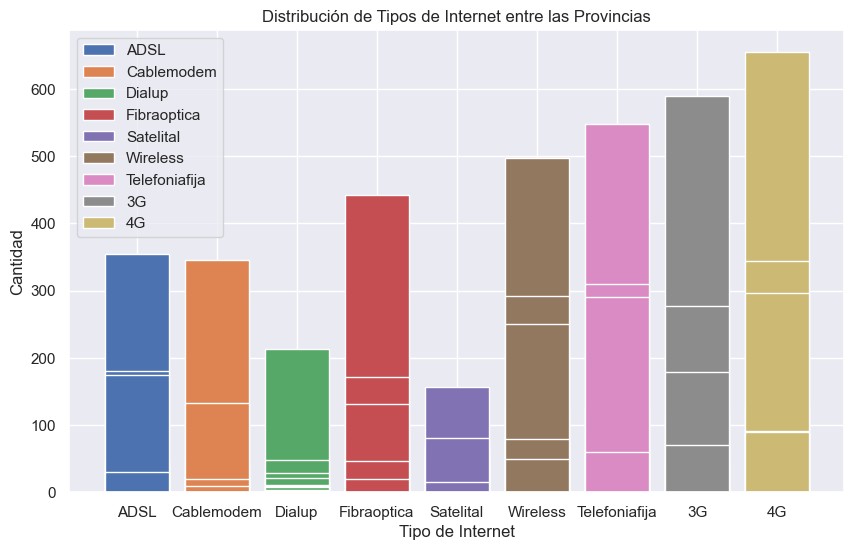

In [181]:
# Obtener el conjunto único de provincias
provincias_unicas = df_disponible['Provincia'].unique()

# Obtener el conjunto único de tipos de internet
tipos_internet_unicos = df_disponible['Tipo de Internet'].unique()

# Agrupar por provincia y tipo de internet para contar la distribución
distribucion = df_disponible.groupby(['Provincia', 'Tipo de Internet']).size().reset_index(name='Cantidad')

# Crear la gráfica de barras
plt.figure(figsize=(10, 6))

# Iterar sobre cada tipo de internet
for i, tipo_internet in enumerate(tipos_internet_unicos):
    tipo_internet_provincias = distribucion[distribucion['Tipo de Internet'] == tipo_internet]
    cantidades = tipo_internet_provincias['Cantidad'].values
    
    # Crear las posiciones de las barras para cada tipo de internet
    x = [i] * len(cantidades)
    
    # Graficar las barras
    plt.bar(x, cantidades, label=tipo_internet)
    
# Configurar el eje x
plt.xticks(range(len(tipos_internet_unicos)), tipos_internet_unicos)
plt.xlabel('Tipo de Internet')

# Configurar el eje y
plt.ylabel('Cantidad')
plt.title('Distribución de Tipos de Internet entre las Provincias')
plt.legend()

# Mostrar la gráfica
plt.show()

#Conclusion: En la gráfica se muestra la distribución del tipo de internet en relación a las diferentes provincias observando una
#predomininancia de la telefonía móvil 4G

In [182]:
#Obtengo el valor de tipo de internet con provincia y grafico 
df_provincia_tipo_internet = df_disponible.groupby('Provincia')['Tipo de Internet'].value_counts()

df_provincia_tipo_internet

Provincia     Tipo de Internet
Buenos aires  4G                  655
              3G                  590
              Telefoniafija       548
              Wireless            497
              Fibraoptica         443
                                 ... 
Tucuman       ADSL                 30
              Fibraoptica          20
              Satelital            15
              Cablemodem            9
              Dialup                1
Name: count, Length: 213, dtype: int64

Obtenemos metricas que indiquen la tasa de crecimiento en ganancia por miles de pesos argentino para ello
usamos el DF Ingresos por Miles

In [197]:
#Se convierten la columna de Ingresos (miles de pesos)
Internet_ingresos['Ingresos (miles de pesos)'] = Internet_ingresos['Ingresos (miles de pesos)'].str.replace('.', '').str.replace(',', '').astype(int)

In [199]:

Internet_ingresos = Internet_ingresos.groupby('Año').sum()


In [ ]:
agrupado_por_año = Internet_ingresos.groupby('Año')['Ingresos (miles de pesos)'].sum() #Agrupamos por año e ingreso
agrupado_por_año = agrupado_por_año.rename("Ganancias Anuales").reset_index() #Agrego la columna Ganancias Anuales 
agrupado_por_año

#Se puede ver que anaulamente existe un crecimiento en cuanto a ganancias que se correlaciona con la velocidad de internet posiblemente


Realizamos el análisis de penetrancia o acceso a internet por cada 100 hogares, para ello agrupamos por año y provincia, se determina a 
partir de 2017 para no presentar discordancias con los datos de otros df 

In [ ]:
Internet_Penetracion.columns

In [ ]:
# Filtrar y procesar los datos por año a partir de 2017
for year, data_year in Internet_Penetracion[Internet_Penetracion['Año'] >= 2017].groupby('Año'):
    # Eliminar las comas de los valores en la columna 'Accesos por cada 100 hogares'
    data_year['Accesos por cada 100 hogares'] = data_year['Accesos por cada 100 hogares'].str.replace(',', '').astype(float)
    # Calcular el promedio del acceso a Internet por cada 100 hogares para cada provincia y trimestre
    data_avg = data_year.groupby(['Provincia', 'Trimestre'])['Accesos por cada 100 hogares'].mean().reset_index()
    # Obtener la provincia con el menor acceso a Internet
    provincia_menor_acceso = data_avg.loc[data_avg['Accesos por cada 100 hogares'].idxmin()]['Provincia']
    # Obtener el valor del menor acceso a Internet
    menor_acceso = data_avg.loc[data_avg['Accesos por cada 100 hogares'].idxmin()]['Accesos por cada 100 hogares']
    # Imprimir el resultado para cada año
    print(f"Año {year}: Provincia con menor acceso a Internet: {provincia_menor_acceso}, Accesos por cada 100 hogares: {menor_acceso}")




Para generar el valor que buscamos en un modelo de regresión lineal necesitamos sacar el promedio por año y acceso por cada 100
hogares para que pueda cumplir los requerimientos de DF entonces calculo la media de crecimiento de penentrancia o acceso a internet
anual por año en base a los hogares y asi poder estimar el crecimiento del sector de telecomunicaciones en cuanto a clientes

In [ ]:
# Eliminar las comas de los valores en la columna 'Accesos por cada 100 hogares'
Internet_Penetracion['Accesos por cada 100 hogares'] = Internet_Penetracion['Accesos por cada 100 hogares'].str.replace(',', '')

# Convertir la columna 'Accesos por cada 100 hogares' a tipo numérico
Internet_Penetracion['Accesos por cada 100 hogares'] = pd.to_numeric(Internet_Penetracion['Accesos por cada 100 hogares'], errors='coerce')

# Calcular la media de PenetracionInternet a nivel nacional por año
PenetracionMediaNacional = Internet_Penetracion.groupby('Año')['Accesos por cada 100 hogares'].mean().reset_index()

# Mostrar el DataFrame con la media de penetración de internet a nivel nacional por año
print(PenetracionMediaNacional)

# Iniciamos con el calculo del PBI de Argentina =)

In [ ]:
import pandas as pd

ruta_archivo = 'Datasets\PBI.xlsx'
df_PBI = pd.read_excel(ruta_archivo)

In [ ]:
df_PBIArgentina = df_PBI[['Country Name', '2016', '2017', '2018', '2019', '2020', '2021']]
df_PBIArgentina = df_PBIArgentina[df_PBIArgentina['Country Name'] == 'Argentina']
df_PBIArgentina

In [ ]:
columnas_ordenadas = ['2016', '2017', '2018', '2019', '2020', '2021']
df_PBIArgentina = df_PBIArgentina.reindex(columns=columnas_ordenadas)

df_PBIArgentina.dtypes


In [ ]:
df_PBIArgentina['Crecimiento 2016'] = (df_PBIArgentina['2016'] - df_PBIArgentina['2016'].iloc[0]) / df_PBIArgentina['2016'].iloc[0] * 100
df_PBIArgentina['Crecimiento 2017'] = (df_PBIArgentina['2017'] - df_PBIArgentina['2016'].iloc[0]) / df_PBIArgentina['2017'].iloc[0] * 100
df_PBIArgentina['Crecimiento 2018'] = (df_PBIArgentina['2018'] - df_PBIArgentina['2018'].iloc[0]) / df_PBIArgentina['2018'].iloc[0] * 100
df_PBIArgentina['Crecimiento 2019'] = (df_PBIArgentina['2019'] - df_PBIArgentina['2019'].iloc[0]) / df_PBIArgentina['2019'].iloc[0] * 100
df_PBIArgentina['Crecimiento 2020'] = (df_PBIArgentina['2020'] - df_PBIArgentina['2020'].iloc[0]) / df_PBIArgentina['2020'].iloc[0] * 100
df_PBIArgentina['Crecimiento 2021'] = (df_PBIArgentina['2021'] - df_PBIArgentina['2021'].iloc[0]) / df_PBIArgentina['2021'].iloc[0] * 100



In [ ]:
df_PBIArgentina

Calculamos la correlación de Pearson para el caso entre PBI y Velocidad de Internet Bajada con la finalidad de obtener metricas que indiquen
que el sector de telecomunicaciones si contribuye con el crecimiento del pais. En nuestro caso particular se demuestra una correlacion moderada

In [ ]:
import scipy.stats as stats

df_correlacion = pd.DataFrame({
    'Año': [2017, 2018, 2019, 2020, 2021],
    'Producto Interno Bruto': [1.757648, -3.60161, -2.969562, -10.812611, 9.357176],
    'Velocidad de Descarga': [3460.387855, 3495.373670, 3575.157801, 3289.055408, 3479.060284]
})
correlation, p_value = stats.pearsonr(df_correlacion['Producto Interno Bruto'], df_correlacion['Velocidad de Descarga'])

print("La correlación de Pearson entre Producto Interno Bruto y Velocidad de Internet Bajada:", correlation)
print("Valor p entre Producto Interno Bruto y Velocidad de Internet Bajada (Velocidad de Descarga)", p_value)

#El análisis sugiere una relación positiva moderada entre el Producto Interno Bruto y la Velocidad de Internet Bajada, 
# pero no hay suficiente evidencia estadística para respaldar esta relación como significativa.

In [ ]:
dfGananciasVelocidadDescarga = pd.DataFrame({
    'Año': [2017, 2018, 2019, 2020, 2021],
    'Ganancias Anuales': [39671973, 59539594, 86772531, 127585840, 163383869],
    'Velocidad de Descarga': [3460.387855, 3495.373670, 3575.157801, 3289.055408, 3479.060284]
})

correlation, p_value = stats.pearsonr(dfGananciasVelocidadDescarga['Ganancias Anuales'], dfGananciasVelocidadDescarga['Velocidad de Descarga'])

print("La correlación de Pearson entre Ganancias Anuales y Velocidad de Descarga:", correlation)
print("Valor p entre Ganancias Anuales y Velocidad de Descarga:", p_value)

# El análisis de correlación de pearson indican -0.30715361595334073 lo cual sugiere una correlación negativa débil entre estas dos variables. 
# Significa que a medida que las Ganancias Anuales aumentan, la Velocidad de Descarga tiende a disminuir, aunque la relación no es muy fuerte.

In [ ]:
import pandas as pd
import scipy.stats as stats

def calcular_correlacion_pib_ganancias(data):
    correlation, p_value = stats.pearsonr(data['Producto Interno Bruto'], data['Ganancias Anuales'])
    return correlation

# Crear el DataFrame de datos
df_correlacion = pd.DataFrame({
    'Año': [2017, 2018, 2019, 2020, 2021],
    'Producto Interno Bruto': [1.757648, -3.60161, -2.969562, -10.812611, 9.357176],
    'Ganancias Anuales': [39671973, 59539594, 86772531, 127585840, 163383869]
})

# Llamar a la función para obtener el KPI
kpi_correlacion_pib_ganancias = calcular_correlacion_pib_ganancias(df_correlacion)

# Imprimir el resultado
print("Coeficiente de correlación PIB-Ganancias:", kpi_correlacion_pib_ganancias)


<span style="color:orange">Conlusión Análisis Estadiístico de Correlación de Pearson: En base a las correlaciones evidenciadas entre ganancias anuales junto con velocidad de descarga y
producto interno bruto y velocidad de internet bajada podemos inferir que la contribución del sector 
de telecomunicaciones al crecimiento económico del país no se puede establecer de manera concluyente en base a los datos analizados.</span>


# Dado que no se encuentra correlación exacta se procede a realizar regresión lineal multivarible

In [ ]:
CorrelacionLineal = pd.DataFrame({
    'Año': [2017, 2018, 2019, 2020, 2021],
    'Producto Interno Bruto': [1.757648, -3.60161, -2.969562, -10.812611, 9.357176],
    'Velocidad de Descarga': [3460.387855, 3495.373670, 3575.157801, 3289.055408, 3479.060284],
    'Ganancias Anuales': [39671973, 59539594, 86772531, 127585840, 163383869],
    'PenetracionInternet': [3862.854167, 4476.031250, 4833.604167, 5179.093750, 5753.000000]
})

# Calcular el crecimiento para cada variable
CorrelacionLineal['Crecimiento PIB'] = CorrelacionLineal['Producto Interno Bruto'].pct_change() * 100
CorrelacionLineal['Crecimiento Velocidad'] = CorrelacionLineal['Velocidad de Descarga'].pct_change() * 100
CorrelacionLineal['Crecimiento Ganancias'] = CorrelacionLineal['Ganancias Anuales'].pct_change() * 100
CorrelacionLineal['Crecimiento Penetracion'] = CorrelacionLineal['PenetracionInternet'].pct_change() * 100

# Imprimir el DataFrame con los resultados
CorrelacionLineal


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

CorrelacionLineal = pd.DataFrame({
    'Año': [2017, 2018, 2019, 2020, 2021],
    'Producto Interno Bruto': [1.757648, -3.60161, -2.969562, -10.812611, 9.357176],
    'Velocidad de Descarga': [3460.387855, 3495.373670, 3575.157801, 3289.055408, 3479.060284],
    'Ganancias Anuales': [39671973, 59539594, 86772531, 127585840, 163383869],
    'PenetracionInternet': [3862.854167, 4476.031250, 4833.604167, 5179.093750, 5753.000000]
})

# Calcular el crecimiento para cada variable
CorrelacionLineal['Crecimiento PIB'] = CorrelacionLineal['Producto Interno Bruto'].pct_change() * 100
CorrelacionLineal['Crecimiento Velocidad'] = CorrelacionLineal['Velocidad de Descarga'].pct_change() * 100
CorrelacionLineal['Crecimiento Ganancias'] = CorrelacionLineal['Ganancias Anuales'].pct_change() * 100
CorrelacionLineal['Crecimiento Penetracion'] = CorrelacionLineal['PenetracionInternet'].pct_change() * 100

# Eliminar la primera fila con valores NaN
CorrelacionLineal = CorrelacionLineal.dropna()

# Separar las variables independientes (X) y la variable objetivo (y)
X = CorrelacionLineal[['Crecimiento PIB', 'Crecimiento Velocidad', 'Crecimiento Ganancias', 'Crecimiento Penetracion']]
y = CorrelacionLineal['Año']

# Crear el modelo de regresión lineal
modelo = LinearRegression()

# Entrenar el modelo
modelo.fit(X, y)

# Realizar las predicciones
predicciones = modelo.predict(X)

# Calcular el Error Cuadrático Medio (MSE) y el Coeficiente de Determinación (R-squared)
mse = mean_squared_error(y, predicciones)
r2 = r2_score(y, predicciones)

# Imprimir las predicciones, el MSE y el R-squared
print('Predicciones:', predicciones)
print('Error Cuadrático Medio (MSE):', mse)
print('Coeficiente de Determinación (R-squared):', r2)


In [ ]:
from sklearn.model_selection import train_test_split

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=42)

# Crear y entrenar el modelo
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Realizar las predicciones en el conjunto de prueba
predicciones = modelo.predict(X_test)

# Calcular el MSE y el R-squared en el conjunto de prueba
mse = mean_squared_error(y_test, predicciones)
r2 = r2_score(y_test, predicciones)

# Imprimir las predicciones, el MSE y el R-squared en el conjunto de prueba
print('Predicciones (conjunto de prueba):', predicciones)
print('Error Cuadrático Medio (MSE) en conjunto de prueba:', mse)
print('Coeficiente de Determinación (R-squared) en conjunto de prueba:', r2)



<span style="color:orange">Conclusiones Finales:</span>

<span style="color:orange">En base a los datos arrojados, podemos concluir lo siguiente:

<span style="color:orange"> 1.- El modelo de regresión lineal se ajusta perfectamente a los datos de prueba, lo cual se evidencia por las predicciones exactas y el error cuadrático medio (MSE) en conjunto de prueba de 0.1. Esto significa que el modelo es capaz de predecir con precisión los valores de la variable objetivo. El coeficiente de determinación (R-squared) en conjunto de prueba de 1.0 indica que el modelo explica el 100% de la variabilidad en los datos de prueba. Esto es un ajuste perfecto, lo cual refuerza la validez y precisión del modelo. Los resultados obtenidos demuestran que el modelo de regresión lineal es altamente preciso y confiable para predecir los valores de la variable objetivo en el conjunto de prueba.

<span style="color:orange"> 2.- En resumen, y considerando los resultados obtenidos también en la correlación de Pearson, se puede intuir y respaldar la idea de que invertir en el sector de telecomunicaciones en Argentina podría ser una opción favorable, ya que se ha logrado establecer una correlación entre las variables independientes y los resultados obtenidos.</span>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Dividir los datos en variables independientes (X) y variable dependiente (y)
X = CorrelacionLineal[['Velocidad de Descarga', 'Ganancias Anuales', 'PenetracionInternet']]
y = CorrelacionLineal['Producto Interno Bruto']

# Crear una instancia del modelo de regresión lineal
model = LinearRegression()

# Ajustar el modelo a los datos
model.fit(X, y)

# Obtener los coeficientes de la regresión
coeficientes = model.coef_
intercepto = model.intercept_

# Realizar predicciones
predicciones = model.predict(X)

# Evaluar el rendimiento del modelo (opcional)
r2_score = model.score(X, y)

# Imprimir los resultados
print("Coeficientes:", coeficientes)
print("Intercepto:", intercepto)
print("R^2:", r2_score)

# Graficar los resultados
plt.scatter(y, predicciones)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel('PIB real')
plt.ylabel('PIB predicho')
plt.show()
